In [20]:
import pandas
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from scipy.optimize import curve_fit

In [18]:
def logistic(x, L, k, x0):
    """
    Logistic function f(x) = L / (1 + exp(-k(x-x0)))
    
    Input:
    L - overall scale
    k - curve steepness
    x0 - offset
    x - variable
    Output: f(x) 
    """
    return L/(1+np.exp(-k*(x-x0)))

In [6]:
def extract_covid_data():
    """
    Extracts the data from the csv file.
                                                                                                                                                                                                                   
    Input: None                                                                                                                                                                                                    
    Output: Dataframe containing the information within the csv file.                                                                                                                                              
    """                                                                                                                                                                                                            
    base_filepath = "/home/conan/Documents/Projects/COVID-19_County_Data"                                                                                                                                          
    filename = "us-counties.csv"                                                                                                                                                                                   
                                                                                                                                                                                                                   
    data_filepath = base_filepath + "/" + filename                                                                                                                                                                 
    return  pandas.read_csv(data_filepath,                                                                                                                                                                         
                            parse_dates = ['date'])    

In [7]:
def get_county_data(dataframe, county, state):                                                                                                                                                                     
    """                                                                                                                                                                                                            
    Filters out the input dataframe and returns a dataframe only for that county.                                                                                                                                  
                                                                                                                                                                                                                   
    Input:                                                                                                                                                                                                         
        Dataframe - Dataframe of data.                                                                                                                                                                             
        County - County as a string                                                                                                                                                                                
    """                                                                                                                                                                                                            
    print( dataframe['state']==state)                                                                                                                                                                              
    state_data = dataframe[dataframe['state']==state]                                                                                                                                                              
    print(state_data)                                                                                                                                                                                              
    county_data = state_data[state_data['county']==county]                                                                                                                                                         
    return county_data  

In [8]:
# Get COVID-19 data                                                                                                                                                                                            
covid_dataframe = extract_covid_data()                                                                                                                                                                         
dane_county_data = get_county_data(covid_dataframe,'Dane','Wisconsin')                                                                                                                                         
print(dane_county_data.tail(20))                                                                                                                                                                               
dane_covid_change = dane_county_data['cases'].diff()                                                                                                                                                           

0          False
1          False
2          False
3          False
4          False
           ...  
1335976    False
1335977    False
1335978    False
1335979    False
1335980    False
Name: state, Length: 1335981, dtype: bool
              date     county      state     fips  cases  deaths
78      2020-02-05       Dane  Wisconsin  55025.0      1     0.0
87      2020-02-06       Dane  Wisconsin  55025.0      1     0.0
96      2020-02-07       Dane  Wisconsin  55025.0      1     0.0
105     2020-02-08       Dane  Wisconsin  55025.0      1     0.0
114     2020-02-09       Dane  Wisconsin  55025.0      1     0.0
...            ...        ...        ...      ...    ...     ...
1335953 2021-05-19   Waukesha  Wisconsin  55133.0  48875   587.0
1335954 2021-05-19    Waupaca  Wisconsin  55135.0   6038   164.0
1335955 2021-05-19   Waushara  Wisconsin  55137.0   2517    37.0
1335956 2021-05-19  Winnebago  Wisconsin  55139.0  21322   219.0
1335957 2021-05-19       Wood  Wisconsin  55141.0   7601

Text(2021-01-26 00:00:00, 0, 'UW Classes Begin')

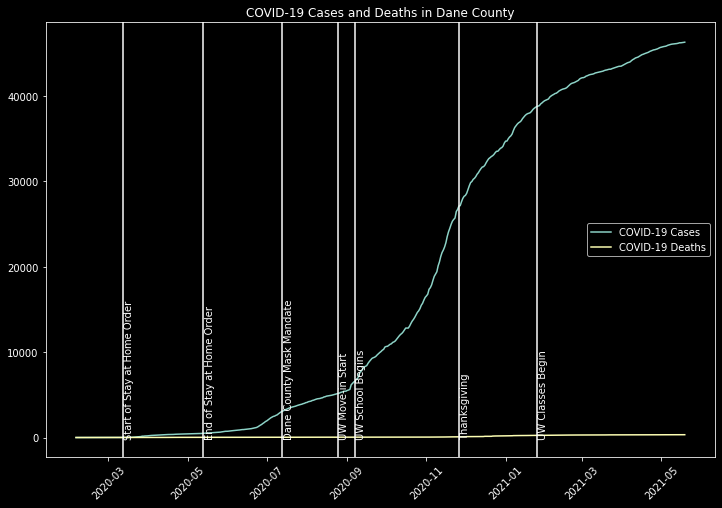

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.style.use('dark_background')
# Plot data for Dane county                                                                                                                                                                                    
dane_covid_cases_plot = plt.plot(dane_county_data['date'],dane_county_data['cases'], label='COVID-19 Cases')                                                                                                   
plt.xticks(rotation=45)                                                                                                                                                                                        
dane_covid_deaths_plot = plt.plot(dane_county_data['date'],dane_county_data['deaths'], label='COVID-19 Deaths')                                                                                                
plt.legend()                                                                                                                                                                                                   
plt.title('COVID-19 Cases and Deaths in Dane County')
# Add beginning and end of stay at home order                                                                                                                                                                  
plt.axvline(dt.datetime(2020,3,12))                                                                                                                                                                            
plt.text(dt.datetime(2020,3,13),30,'Start of Stay at Home Order', rotation=90)                                                                                                                                 
plt.axvline(dt.datetime(2020,5,13))                                                                                                                                                                            
plt.text(dt.datetime(2020,5,14),0,'End of Stay at Home Order',rotation=90)                                                                                                                                     
plt.axvline(dt.datetime(2020,7,13))                                                                                                                                                                            
plt.text(dt.datetime(2020,7,14),0,'Dane County Mask Mandate',rotation=90)                                                                                                                                      
plt.axvline(dt.datetime(2020,9,7))                                                                                                                                                                             
plt.text(dt.datetime(2020,9,8),0,'UW School Begins', rotation=90)                                                                                                                                              
plt.axvline(dt.datetime(2020,8,25))                                                                                                                                                                            
plt.text(dt.datetime(2020,8,26),0,'UW Move-in Start', rotation=90)
plt.axvline(dt.datetime(2020,11,26))
plt.text(dt.datetime(2020,11,27),0,'Thanksgiving', rotation=90)
plt.axvline(dt.datetime(2021,1,25))
plt.text(dt.datetime(2021,1,26),0,'UW Classes Begin', rotation=90)

Text(2021-01-26 00:00:00, 0, 'UW Classes Begin')

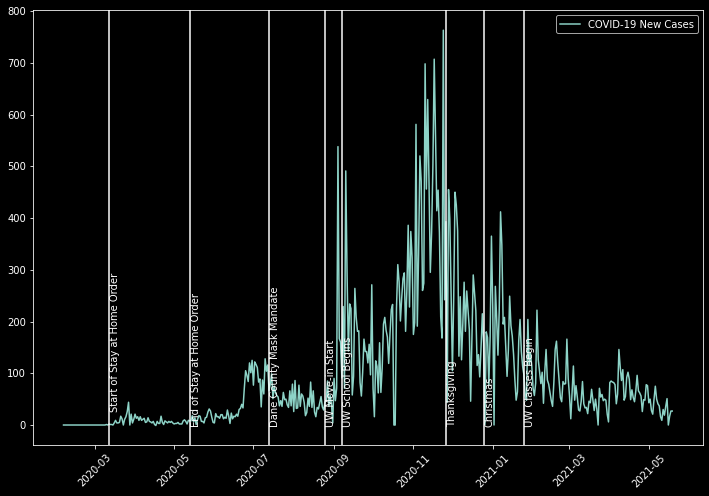

In [10]:
# Plot differences in cases
plt.figure(1)
plt.xticks(rotation=45)
dane_covid_cases_delta = plt.plot(dane_county_data['date'],dane_covid_change, label='COVID-19 New Cases')
plt.legend()
plt.axvline(dt.datetime(2020,3,12))
plt.text(dt.datetime(2020,3,13),30,'Start of Stay at Home Order', rotation=90)
plt.axvline(dt.datetime(2020,5,13))
plt.text(dt.datetime(2020,5,14),0,'End of Stay at Home Order',rotation=90)
plt.axvline(dt.datetime(2020,7,13))
plt.text(dt.datetime(2020,7,14),0,'Dane County Mask Mandate',rotation=90)
plt.axvline(dt.datetime(2020,9,7))
plt.text(dt.datetime(2020,9,8),0,'UW School Begins', rotation=90)
plt.axvline(dt.datetime(2020,8,25))
plt.text(dt.datetime(2020,8,26),0,'UW Move-in Start', rotation=90)
plt.axvline(dt.datetime(2020,11,26))
plt.text(dt.datetime(2020,11,27),0,'Thanksgiving', rotation=90)
plt.axvline(dt.datetime(2020,12,25))
plt.text(dt.datetime(2020,12,26),0,'Christmas', rotation=90)
plt.axvline(dt.datetime(2021,1,25))
plt.text(dt.datetime(2021,1,26),0,'UW Classes Begin', rotation=90)

In [29]:
# Apply regular least squares
float_time = [[i.timestamp()] for i in dane_county_data['date']]
dane_covid_cases = [i for i in dane_county_data['cases']]

In [12]:
reg = LinearRegression().fit(float_time,dane_covid_cases)
print("Least Squares:",reg.score(float_time,dane_covid_cases))
print("Coefficients:",reg.coef_)
print("Intercept:",reg.intercept_)


Least Squares: 0.9043814260808722
Coefficients: [0.00145195]
Intercept: -2306731.106763764


In [47]:
#Apply logistic regression curve fitting
float_time = [i for i in range(len(dane_county_data['date']))]
predict_time = [i for i in range(600)]
dane_covid_cases = [i for i in dane_county_data['cases']]
logistic_params,_=curve_fit(logistic, float_time, dane_covid_cases)

In [39]:
print(logistic_params)

[4.58125559e+04 2.48917870e-02 2.85812012e+02]


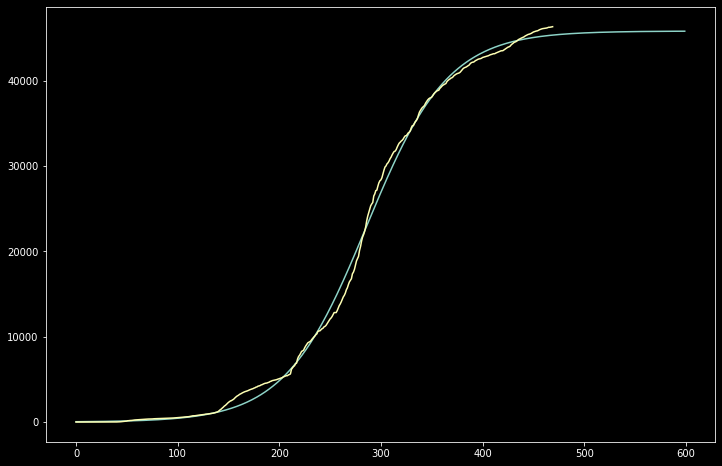

In [48]:
plt.figure(2)
dane_county_fit=plt.plot(predict_time, logistic(predict_time, logistic_params[0], logistic_params[1], logistic_params[2]), label="Dane County Logistic Regression")
dane_county_fit=plt.plot(float_time, dane_covid_cases, label="Dane County COVID-19 Cases")
